In [14]:
from classification import DecisionTree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('../cancer_data.csv')
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [15]:
df['treatment_type'].value_counts()

treatment_type
Radiation Therapy, NOS                         7180
Pharmaceutical Therapy, NOS                    7147
Surgery, NOS                                     55
Chemotherapy                                     51
Targeted Molecular Therapy                       50
Immunotherapy (Including Vaccines)               48
Radiation, 3D Conformal                           8
Radiation, 2D Conventional                        5
Hormone Therapy                                   4
Radiation, Intensity-Modulated Radiotherapy       3
Radiation, Proton Beam                            1
Name: count, dtype: int64

In [16]:
# Keep rows where 'treatment_type' is 'A' or 'B'
values_to_keep = ['Radiation Therapy, NOS', 'Pharmaceutical Therapy, NOS']
df_filtered = df[df['treatment_type'].isin(values_to_keep)]
df_filtered = pd.DataFrame(df_filtered.copy())

print(df_filtered['treatment_type'].value_counts())
df_filtered.info()

treatment_type
Radiation Therapy, NOS         7180
Pharmaceutical Therapy, NOS    7147
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14327 entries, 4 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14327 non-null  object
 1   race                         14327 non-null  object
 2   sex                          14327 non-null  object
 3   age_at_diagnosis             14327 non-null  int64 
 4   morphology                   14327 non-null  object
 5   primary_diagnosis            14327 non-null  object
 6   primary_diagnosis_condition  14327 non-null  object
 7   primary_diagnosis_site       14327 non-null  object
 8   vital_status                 14327 non-null  object
 9   treatment_type               14327 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [17]:
# bin the age column
bin_intervals = range(0, df['age_at_diagnosis'].max() + 5000, 5000)

bin_labels = [f"{bin_intervals[i]}-{bin_intervals[i+1] - 1}" for i in range (len(bin_intervals) - 1)]

df_filtered['age_at_diagnosis'] = pd.cut(df['age_at_diagnosis'], bins=bin_intervals, labels=bin_labels, right=False)

df_filtered

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
4,HCMI.HCM-BROD-0002-C71,white,male,20000-24999,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
9,HCMI.HCM-BROD-0003-C71,white,female,25000-29999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
10,HCMI.HCM-BROD-0011-C71,white,male,15000-19999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
19,HCMI.HCM-BROD-0012-C71,white,female,20000-24999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
24,HCMI.HCM-BROD-0014-C71,white,male,20000-24999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...
14547,TCGA.TCGA-Z7-A8R5,white,female,20000-24999,8520/3,"Lobular carcinoma, NOS",Breast Cancer,Breast,Alive,"Pharmaceutical Therapy, NOS"
14548,TCGA.TCGA-Z7-A8R6,white,female,15000-19999,8022/3,Pleomorphic carcinoma,"Epithelial Neoplasms, NOS",Breast,Alive,"Radiation Therapy, NOS"
14549,TCGA.TCGA-Z7-A8R6,white,female,15000-19999,8022/3,Pleomorphic carcinoma,"Epithelial Neoplasms, NOS",Breast,Alive,"Pharmaceutical Therapy, NOS"
14550,TCGA.TCGA-Z7-A8R6,white,female,15000-19999,8022/3,Pleomorphic carcinoma,Breast Cancer,Breast,Alive,"Radiation Therapy, NOS"


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Encoding
df_encoded = pd.DataFrame(OrdinalEncoder().fit_transform(df_filtered))

# Split the DataFrame back into features and target
# 8 = 'vital_status'
# 9 = 'treatment_type'
X = df_encoded.drop(columns=[0, 1, 2, 4, 8])
print(X.head())
y = df_encoded[8]
print(y.value_counts())

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

# # Convert X splits into lists
X_train = X_train.values.tolist()  # Features for training set as a list of lists
X_val = X_val.values.tolist()      # Features for validation set as a list of lists
X_test = X_test.values.tolist()    # Features for test set as a list of lists
y_train = y_train.values.tolist()  # Features for training set as a list of lists
y_val = y_val.values.tolist()      # Features for validation set as a list of lists
y_test = y_test.values.tolist()    # Features for test set as a list of lists

# classifier = DecisionTree()
classifier = DecisionTree()
classifier.fit(X_train, y_train)

train_y_hat = classifier.predict(X_train)
validation_y_hat = classifier.predict(X_val)
test_y_hat = classifier.predict(X_test)

# Generate classification report
val_report = classification_report(y_val, validation_y_hat)
print("Validation performance: \n", val_report)

test_report = classification_report(y_test, test_y_hat)
print("Test performance: \n", test_report)


     3     5     6    7    9
0  3.0  11.0  12.0  0.0  1.0
1  4.0  10.0  12.0  0.0  1.0
2  2.0  10.0  12.0  0.0  1.0
3  3.0  10.0  12.0  0.0  1.0
4  3.0  10.0  12.0  0.0  1.0
8
0.0    9027
1.0    5300
Name: count, dtype: int64
(10028, 5) (2149, 5) (2150, 5)
Validation performance: 
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1357
         1.0       0.69      0.63      0.66       792

    accuracy                           0.76      2149
   macro avg       0.74      0.73      0.74      2149
weighted avg       0.76      0.76      0.76      2149

Test performance: 
               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1355
         1.0       0.70      0.63      0.67       795

    accuracy                           0.76      2150
   macro avg       0.75      0.74      0.74      2150
weighted avg       0.76      0.76      0.76      2150



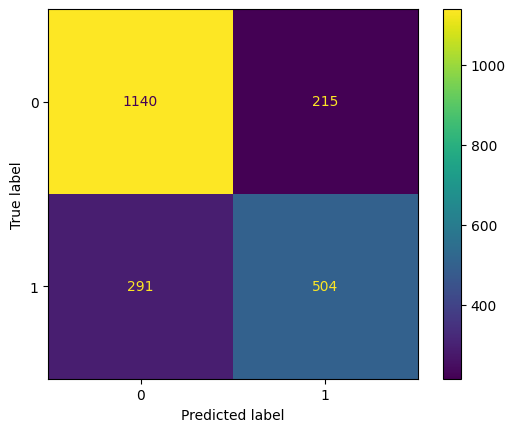

In [19]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, test_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

In [7]:
# Define a function to map values
def map_values(value):
    if value == 'Radiation Therapy, NOS':
        return 1
    elif value == 'Pharmaceutical Therapy, NOS':
        return 0
    else:
        return -1

# Apply the function to the column
df_filtered['binary_treatment_type'] = df_filtered['treatment_type'].apply(map_values)
print(df_filtered['binary_treatment_type'].value_counts())

# Specify the column name for the labels
label_column = 'binary_treatment_type'

# Split the DataFrame into features (X) and labels (y)
X = df_filtered.drop(columns=['subject_id', 'treatment_type', 'binary_treatment_type'])  # All columns except the label column
y = list(df_filtered[label_column]) # Only the label column
print(X.info())
unique_values = list(set(y))
print("Labels:", unique_values)

# Split data into train (70%) and temporary test (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation (50% of temporary) and test (50% of temporary)
# Equivalent to 15% test and %15 validation from the original split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# # Convert X splits into lists
X_train = X_train.values.tolist()  # Features for training set as a list of lists
X_val = X_val.values.tolist()      # Features for validation set as a list of lists
X_test = X_test.values.tolist()    # Features for test set as a list of lists

# classifier = DecisionTree()
classifier = DecisionTree()
classifier.fit(X_train, y_train)

train_y_hat = classifier.predict(X_train)
validation_y_hat = classifier.predict(X_val)
test_y_hat = classifier.predict(X_test)

# Function to calculate performance metrics
def calculate_performance(validation_y, validation_y_hat):
    # Ensure inputs are lists
    validation_y = list(validation_y)
    validation_y_hat = list(validation_y_hat)
    
    # Initialize counters
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0

    # Count TP, FP, TN, FN including -1 cases (for multiclass classification)
    for actual, predicted in zip(validation_y, validation_y_hat):
        if actual == 1 and predicted == 1:
            true_positive += 1
        elif actual == 0 and predicted == 1:
            false_positive += 1
        elif actual == 1 and predicted == 0:
            false_negative += 1
        elif actual == 0 and predicted == 0:
            true_negative += 1
        elif actual == -1:
            if predicted == -1:
                true_negative += 1
            else:
                false_positive += 1
        elif predicted == -1:
            false_negative += 1

    # Calculate metrics
    accuracy = (true_positive + true_negative) / len(validation_y)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

print("\nClassification Report (Train):")
calculate_performance(y_train, train_y_hat)

print("\nClassification Report (Validation):")
calculate_performance(y_val, validation_y_hat)

print("\nClassification Report (Test):")
calculate_performance(y_test, test_y_hat)

# Generate classification report
report = classification_report(y_val, validation_y_hat)
print(report)


binary_treatment_type
1    7180
0    7147
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14327 entries, 4 to 14551
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race                         14327 non-null  object
 1   sex                          14327 non-null  object
 2   age_at_diagnosis             14327 non-null  int64 
 3   morphology                   14327 non-null  object
 4   primary_diagnosis            14327 non-null  object
 5   primary_diagnosis_condition  14327 non-null  object
 6   primary_diagnosis_site       14327 non-null  object
 7   vital_status                 14327 non-null  object
dtypes: int64(1), object(7)
memory usage: 1007.4+ KB
None
Labels: [0, 1]
Training set size: 10028
Validation set size: 2149
Test set size: 2150

Classification Report (Train):
Accuracy: 0.65
Precision: 0.65
Recall: 0.65

Classification Report (Validation):
Ac

In [8]:
classifier.to_dict()

{'type': 'split',
 'column': 2,
 'children': {22342: {'type': 'split',
   'column': 1,
   'children': {'female': {'type': 'class', 'class': 1},
    'male': {'type': 'class', 'class': 1}}},
  19758: {'type': 'class', 'class': 0},
  27857: {'type': 'class', 'class': 0},
  27865: {'type': 'class', 'class': 1},
  26490: {'type': 'split',
   'column': 5,
   'children': {'Kidney Renal Clear Cell Carcinoma': {'type': 'class',
     'class': 0},
    'Gliomas': {'type': 'split',
     'column': 1,
     'children': {'male': {'type': 'class', 'class': 0},
      'female': {'type': 'class', 'class': 0}}},
    'Adenomas and Adenocarcinomas': {'type': 'class', 'class': 0},
    'Glioblastoma Multiforme': {'type': 'class', 'class': 0}}},
  23542: {'type': 'class', 'class': 1},
  27684: {'type': 'split',
   'column': 5,
   'children': {'Ductal and Lobular Neoplasms': {'type': 'class', 'class': 0},
    'Breast Cancer': {'type': 'class', 'class': 0}}},
  14535: {'type': 'split',
   'column': 5,
   'children

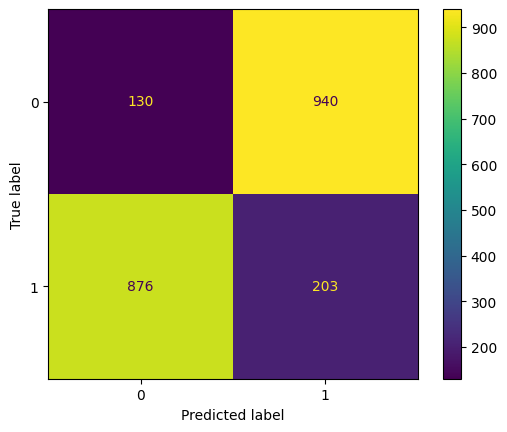

In [46]:
# Generate and display confusion matrix
cm = confusion_matrix(y_val, validation_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

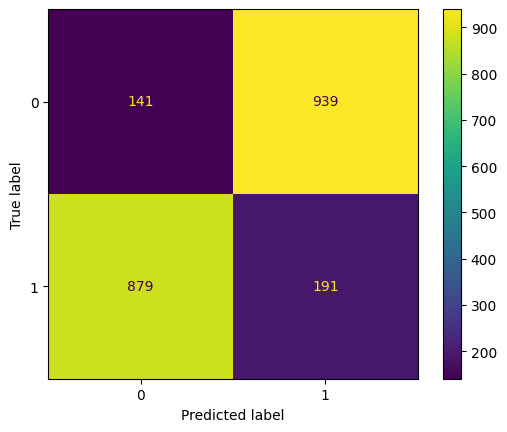

In [47]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, test_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()